# <span style = "color:coral;font-size:40px"> Ecommerce Classification </span>

***

This dataset contains images of Television, Sofas, Jeans and T-shirt. It Actual raw and unstructured image data extracted from online sites.

All images are of different sites. You may also find some junk images in data for example in television dataset you will find the television remote images.

Download the dataset from this website: <a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Here </a>

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import layers
from keras import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

### Read 'ecommerceDataset.csv' and set seperate column names

In [3]:
df = pd.read_csv('ecommerceDataset.csv', names = ['Target', 'Description'])

In [4]:
df.head()

,Target,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


### Check info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Target       50425 non-null  object
 1   Description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


### View basic statistical information about the dataset

In [6]:
df.describe()

,Target,Description
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


### Check for duplicates

In [7]:
df.duplicated().sum()

22622

### Drop duplicates, if Any

In [8]:
df.drop_duplicates(inplace = True, keep = 'first')

### Check for null values

In [9]:
df.isna().sum()

Target         0
Description    1
dtype: int64

### Drop rows with null values, if Any

In [10]:
df.dropna(inplace = True)

### Plot countplot of 'Target' Variable

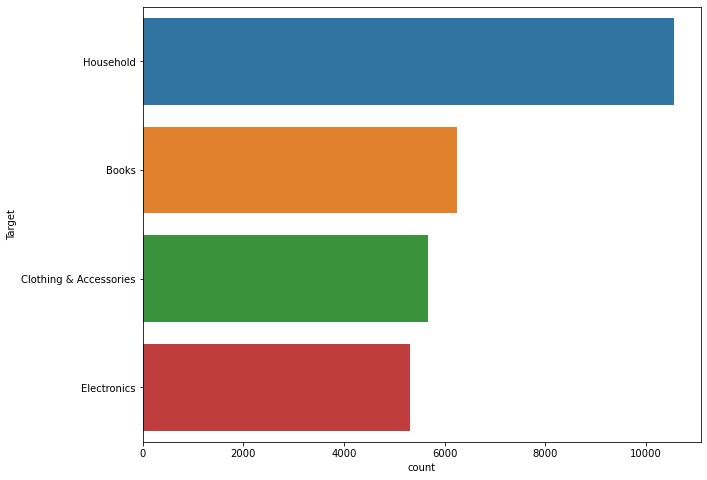

In [11]:
plt.figure(figsize = (10,8))
sns.countplot(y = df['Target'])
plt.show()

### Reset the index

In [12]:
df.reset_index(inplace = True)

### Shuffle the dataset

In [13]:
df = df.sample(frac=1).reset_index(drop=True)

### Print some of the text data

In [14]:
for i in range(10):
    print(df['Description'][i])
    print()

Abraham Lincoln: A Complete Biography (General Press) About the Author Lord Charnwood, a British by birth, was a man of many affairs and much learning. He had training in historical research and his work exhibits evidences of industrious and careful investigation. He made close examination of American newspapers of the period covered and has had access to original manuscript archives in the State and Navy departments at Washington.

Action Pro Front Helmet Mount for Gopro 7 6 5 3 4 Session Yi 4K SJCAM SJ5000x Action Camera Accessories Kit Curved Sticker J-Hook Bracket Features  Made of poly carbonate and stainless steel, high quality and durable. It allows directions adjustable to make your GoPro in the ideal shooting angle you desire. Stable and solid,multi function,wide application range Perfect for skiing, surfing, racing or any other extreme sports Compatible with: GoPro HD Hero 7 6 5 43+ 3 2 1 SJCAM YI EKAN etc.  Package Include  2 X Straight joint (1 long and1 short) 1 X J-Hook b

### Create a preprocess function that does the following operations
    * Convert all the words to lowercase
    * Remove any special symbols or characters
    * Lemmatize all the words
    * Remove all the stopwords

In [15]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    word = ' '.join(word)
    return word

### Apply the preprocess function to the text column

In [16]:
df = df[0:1000]

In [17]:
df['Description'] = df['Description'].apply(preprocess)

### Print some of the texts after the preprocess function

In [18]:
for i in range(10):
    print(df['Description'][i])
    print()

abraham lincoln a complete biography general press about author lord charnwood british birth man many affairs much learn he train historical research work exhibit evidence industrious careful investigation he make close examination american newspapers period cover access original manuscript archive state navy departments washington

action pro front helmet mount gopro 7 6 5 3 4 session yi 4k sjcam sj5000x action camera accessories kit curve sticker j hook bracket feature make poly carbonate stainless steel high quality durable it allow directions adjustable make gopro ideal shoot angle desire stable solid multi function wide application range perfect ski surf race extreme sport compatible gopro hd hero 7 6 5 43 3 2 1 sjcam yi ekan etc package include 2 x straight joint 1 long and1 short 1 x j hook buckle 1 x flat mount adhesive 1 x curve mount adhesive 2 x thumb screw note not include camera show picture

kanchnar women silk banarasi dupatta you would love wear poly silk banarasi dupat

### Split the dataset into Input & Target Variables

In [19]:
X = df['Description']
y = df['Target']

### One Hot Encode the target variables

In [20]:
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [21]:
labels = encoder.classes_

In [22]:
encoder.classes_

array(['Books', 'Clothing & Accessories', 'Electronics', 'Household'],
      dtype='<U22')

### Convert text to sequence and add padding

In [23]:
tokenizer = Tokenizer(num_words=5000)

In [24]:
tokenizer.fit_on_texts(X)

In [25]:
vocab_size = len(tokenizer.word_index) + 1

In [26]:
def text_encoding(txt):
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    padded_sequence = pad_sequences(encoded_docs, maxlen = 128)
    
    return padded_sequence

In [27]:
X = text_encoding(X)

### Split the dataset into training & Testing set

In [28]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 100)

### Create a keras Sequential model with LSTM Layers

In [29]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))

model.add(layers.GRU(256, return_sequences=True))
model.add(layers.Dropout(0.3))

model.add(layers.GRU(128))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation = 'softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1484672   
                                                                 
 gru (GRU)                   (None, None, 256)         296448    
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

### Compile the model

In [31]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

### Train the model

In [32]:
%time model.fit(X_train,y_train, epochs=10, validation_split=0.1)

Epoch 1/10
23/23 [==============================] - 12s 301ms/step - loss: 1.3402 - accuracy: 0.3972 - val_loss: 1.2146 - val_accuracy: 0.4875
Epoch 2/10
23/23 [==============================] - 6s 256ms/step - loss: 0.9822 - accuracy: 0.5569 - val_loss: 0.8751 - val_accuracy: 0.6125
Epoch 3/10
23/23 [==============================] - 6s 265ms/step - loss: 0.4194 - accuracy: 0.8597 - val_loss: 0.8184 - val_accuracy: 0.6875
Epoch 4/10
23/23 [==============================] - 6s 282ms/step - loss: 0.1425 - accuracy: 0.9569 - val_loss: 0.8171 - val_accuracy: 0.7750
Epoch 5/10
23/23 [==============================] - 6s 266ms/step - loss: 0.1083 - accuracy: 0.9750 - val_loss: 0.8984 - val_accuracy: 0.7500
Epoch 6/10
23/23 [==============================] - 6s 262ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 1.0505 - val_accuracy: 0.7625
Epoch 7/10
23/23 [==============================] - 6s 240ms/step - loss: 0.0090 - accuracy: 0.9986 - val_loss: 1.2098 - val_accuracy: 0.7500
Epoch

### Make predictions with X_test

In [33]:
y_pred = model.predict(X_test)

7/7 [==============================] - 1s 59ms/step


In [34]:
y_pred = [np.argmax(i) for i in y_pred]

In [35]:
y_test = [np.argmax(i) for i in y_test]

### Model Evaluation

### Accuracy Score

In [36]:
accuracy_score(y_test,y_pred)

0.725

### Confusion Matrix

<AxesSubplot:>

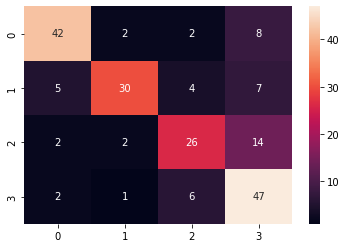

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

### Classification Report

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        54
           1       0.86      0.65      0.74        46
           2       0.68      0.59      0.63        44
           3       0.62      0.84      0.71        56

    accuracy                           0.73       200
   macro avg       0.75      0.72      0.72       200
weighted avg       0.74      0.72      0.73       200



***